<a href="https://colab.research.google.com/github/h4rshhh/spam_mail_detection/blob/main/spam_mail_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score

## Loading the dataset


In [3]:
raw_data = pd.read_csv('/content/mail_dataset.csv')
print(raw_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


#replacing null values with empty string

In [4]:
dataset = raw_data.where((pd.notnull(raw_data)),'')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset.shape


(5572, 2)

In [6]:
dataset['Category'].value_counts()

,count
Category,
ham,4825
spam,747


# Heavily Imbalanced

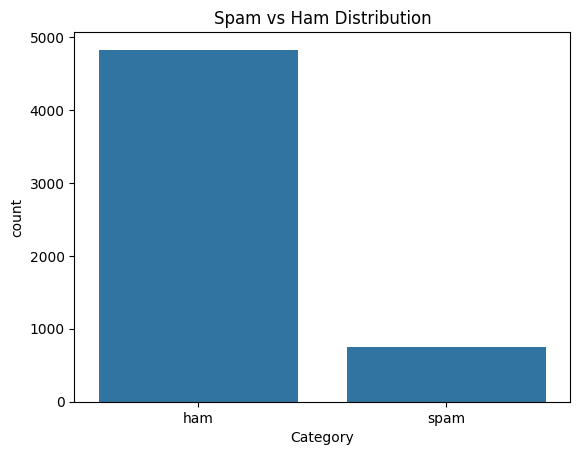

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Category', data=dataset)
plt.title('Spam vs Ham Distribution')
plt.show()


##Label Encoding
We are converting the "Category" column of the dataset from text labels:

"spam" → 1

"ham" → 0

`dataset.loc[row_condition, column_to_update]`

`.loc[]` is used to locate and access rows and columns by label in Pandas.

In [8]:
# Labelling spam -> 1; ham -> 0;
dataset.loc[dataset['Category'] == 'spam','Category'] = 1
dataset.loc[dataset['Category'] == 'ham','Category'] = 0

#Splitting Text and Labels

In [10]:
X = dataset['Message']
Y = dataset['Category']

print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: object


##Splitting into Train Test Split


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
# not Stratified Btw

In [12]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


###Feature Extraction

In [17]:
#transforming the text data to feature vectors so that it can be understood by the maching and can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)

X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [19]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [20]:
model = LogisticRegression()

In [22]:
# training the Logistic Regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

###Prediction on training data

In [50]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


###Prediction on testing data

In [51]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, prediction_on_test_data))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       960
           1       1.00      0.76      0.86       155

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



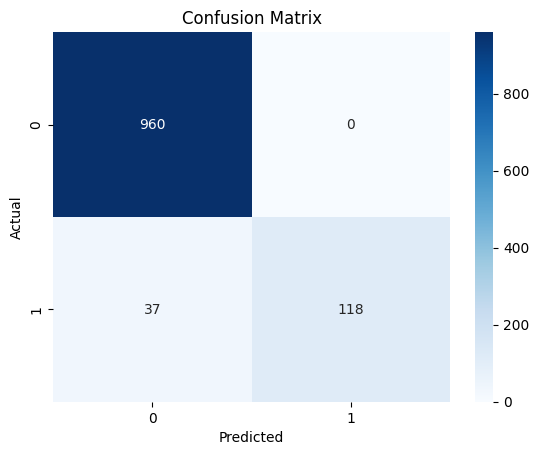

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, prediction_on_test_data)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Strength: Excellent at detecting Not Spam and very precise on Spam when detected.

Weakness: Misses a notable portion of actual Spam (24%), meaning recall for spam could be better.

In [30]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train_features, Y_train)

LogisticRegression(class_weight='balanced')

##Improved Accuracies after putting weight into less dominant class

In [52]:
prediction2_on_training_data = model2.predict(X_train_features)
accuracy2_on_training_data = accuracy_score(Y_train, prediction2_on_training_data)

print('Accuracy on training data : ', accuracy2_on_training_data)

Accuracy on training data :  0.9921471842046219


In [53]:
prediction2_on_test_data = model2.predict(X_test_features)
accuracy2_on_test_data = accuracy_score(Y_test, prediction2_on_test_data)

print('Accuracy on test data : ', accuracy2_on_test_data)

Accuracy on test data :  0.9811659192825112


In [37]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, prediction_on_test_data))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       0.95      0.91      0.93       155

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



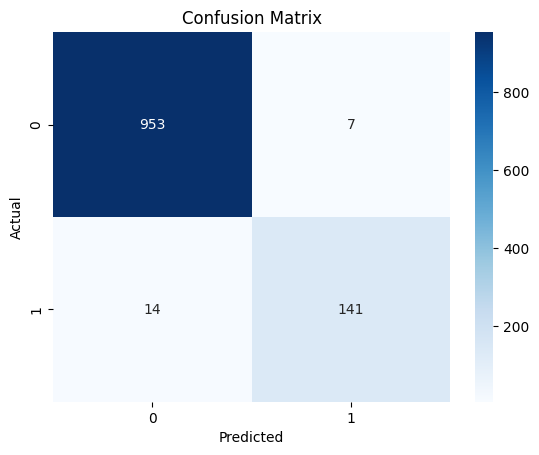

In [36]:
cm = confusion_matrix(Y_test, prediction2_on_test_data)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##The Model is still very precise (95%) — so it’s not screaming “SPAM!” every chance it gets.

##Recall improved dramatically — it now catches more real spam (from 76% → 91%).

##F1-score also jumped (a nice balance between precision & recall).

##SMOTE Resampling
We're still working with imbalanced data. Resampling techniques literally change the number of samples in each class to balance them out before training.

In [54]:
from imblearn.over_sampling import SMOTE

# Create SMOTE instance
smote = SMOTE(random_state=42)

# Resample training data
X_train_smote, Y_train_smote = smote.fit_resample(X_train_features, Y_train)


In [55]:
model3 = LogisticRegression()
model3.fit(X_train_smote, Y_train_smote)


LogisticRegression()

In [58]:
prediction3_on_training_data = model3.predict(X_train_features)
accuracy3_on_training_data = accuracy_score(Y_train, prediction3_on_training_data)

print('Accuracy on training data : ', accuracy3_on_training_data)

Accuracy on training data :  0.9916984518734575


In [61]:
prediction3_on_test_data = model3.predict(X_test_features)
accuracy3_on_test_data = accuracy_score(Y_test, prediction3_on_test_data)

print('Accuracy on training data : ', accuracy3_on_training_data)

Accuracy on training data :  0.9916984518734575


In [62]:
print(classification_report(Y_test, prediction3_on_test_data))
print(confusion_matrix(Y_test, prediction3_on_test_data))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.99      0.90      0.94       155

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[958   2]
 [ 16 139]]


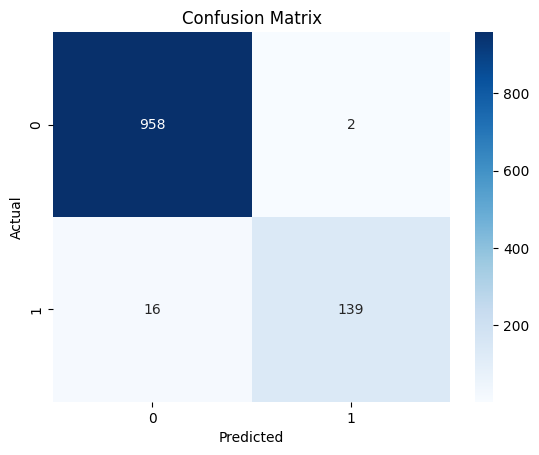

In [64]:
cm = confusion_matrix(Y_test, prediction3_on_test_data)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


-Class 0 (majority): Nearly perfect — only 2 false positives.

- Class 1 (minority): We've got 139 correct predictions out of 155, only 16 false negatives.

- Precision for class 1 is 0.99 — When our model predicts “1”, it's almost always right.

- Recall for class 1 is 0.90 — 90% of actual class 1s are correctly detected (excellent, especially considering it’s the minority class).

- F1-score for class 1: 0.94 — strong balance between precision and recall.

#Using SMOTE + LogisticRegression with class_weight = 'balanced' has definitely paid off.

#We've improved recall on the minority class significantly without sacrificing performance on the majority class.

#This is exactly we wanted in an imbalanced classification.